<a href="https://colab.research.google.com/github/huda-nur-ed/Identify-Facebook-Users-Pattern/blob/main/EDA_to_Identify_Facebook_Users_Pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Objective**:To study and analyse the differences in the way users are using Facebook based on their gender, age-group, etc. and Identify a pattern out of it.

In [ ]:
# Import data visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##1) Load the data and impute missing values


In [ ]:
# Load the dataset
path = '/content/drive/MyDrive/Colab Notebooks/facebook user data.xlsx'
fb_data = pd.read_excel(path)

In [ ]:
# Get first 5 rows
fb_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [ ]:
# Get the shape of the dataset
fb_data.shape

(99003, 15)

We can observe that there are 99003 rows and 15 columns in the given dataset.

In [ ]:
# Get a brief  descriptive summary on the dataset
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [ ]:
# Check if there is any missing values
fb_data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

We have observed that gender and tenure columns have 175  and 2 missing values respectively.

###Replace the null values (NA) of gender column with its mode or median and explain why mode/median used to replace NA values

**We should be using mode to fill the missing values as gender is a categorical feature.**

In [ ]:
# Get the mode value for gender
fb_data.gender.value_counts().index[0]

'male'

In [ ]:
# Fill missing values for gender.
fb_data.gender.fillna(fb_data.gender.mode()[0],inplace=True)

###Replace the null values (NA) of tenure column (numerical variable) with its median, and explain why mode/median used to replace NA values

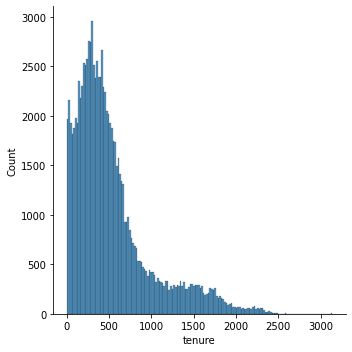

In [ ]:
# Get the distribution plot of tenure
sns.displot(fb_data.tenure)

From the above graph, we have observed that the distribution is right skewed and there are some outliers in the data. Hence, **we should use median to impute the missing values since tenure is a numerical feature.**

In [ ]:
# Fill missing values for tenure.
fb_data.tenure.fillna(fb_data.tenure.median(),inplace=True)

In [ ]:
# Confirm if  missing values in gender and tenure are filled or not.
fb_data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

We have observed that all the missing values have been filled.

##2) Plot heatmap / correlation matrix on all the columns.

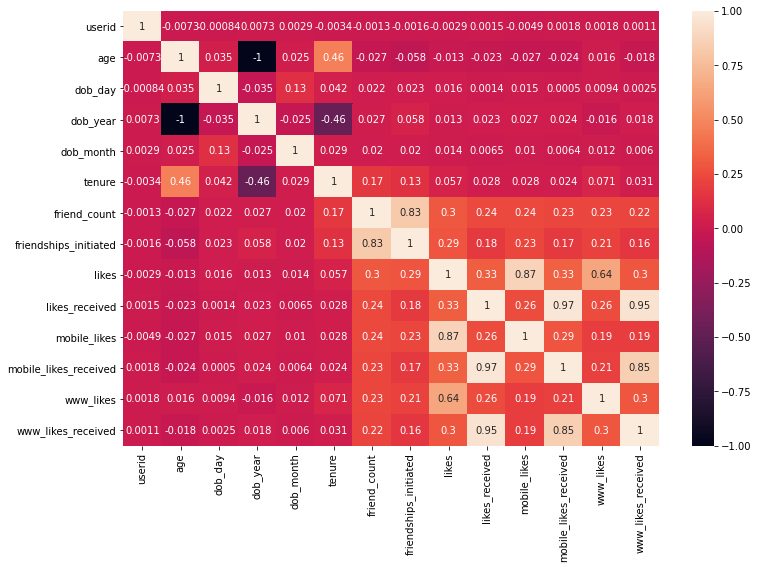

In [ ]:
# Set figure size and plot heatmap of correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(fb_data.corr(),annot=True)

From the above heatmap, we have observed that
* Most of the friends people have on facebook is added by the user as there is a strong correlation between friendships_initiated and friend_count.
*  Most of the people prefer to use mobile while browsing facebook and like in other people's post as as there is a strong between mobile_likes and likes,and also between likes_received and mobile_likes_received.
* People prefer to use web version of facebook as there is a strong correlation between likes_received and www_likes_received, and also between likes and www_likes.

##3) Analysis based on gender of the users

 ### What is composition of male and female users?


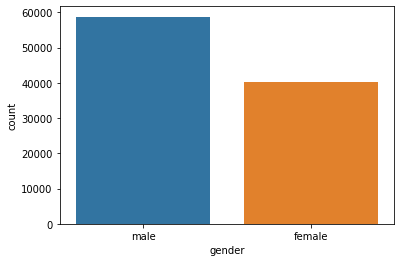

In [ ]:
# Get a countplot of male and female users
sns.countplot(fb_data.gender)

We have observed that male gender category has more users and it is more than 58000, while the female gender constitutes about 40000.

In [ ]:
# Create a function to group users based on their age groups.
def create_age_category(age):
  '''
  Create age groups for users as Teenage,Young Adult,Adult and Old.
  '''
  if age <= 19:
    return 'Teenage'
  elif age >= 20 and age <= 30:
    return 'Young Adult'
  elif age > 30 and age <= 50:
    return 'Adult'
  elif age > 50 :
    return 'Old'


In [ ]:
# Create a new column 'age_group'
fb_data['age_group'] = fb_data.age.apply(create_age_category)

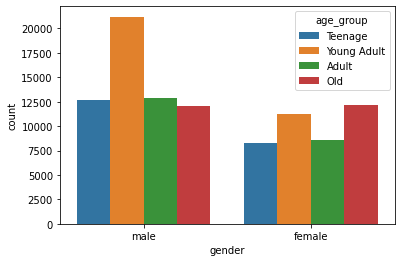

In [ ]:
# Get the composition of genders based on different age group
sns.countplot(fb_data.gender,hue=fb_data.age_group)

From the above graph, we have observe that
* Maximum number of most male facebook users fall under Young Adult category(i.e.20-30 years group). This may be due to the fact that social circle for male users under this age category grows tremendously. While male above 50 years use this social media platform least. 
* Maximum number of most female facebook users fall under Old age category(i.e. above 50 years).Female facebook users in Young Adult category(i.e.20-30 years group) use this platform the least among all other age groups.

### Which category of gender has more friends?


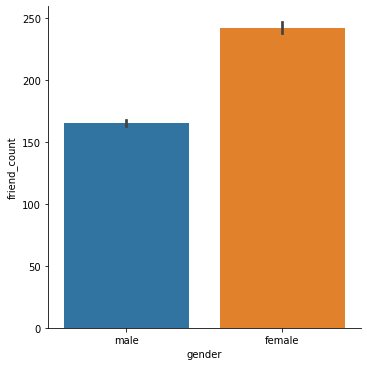

In [ ]:
# Get a catplot to analyze the friend count distribution across genders
sns.catplot(x=fb_data.gender, y=fb_data.friend_count, kind="bar", data=fb_data)

From the above graph, we have observed that female has more friends compared to males.

###  Which category of gender initiated more friendships?


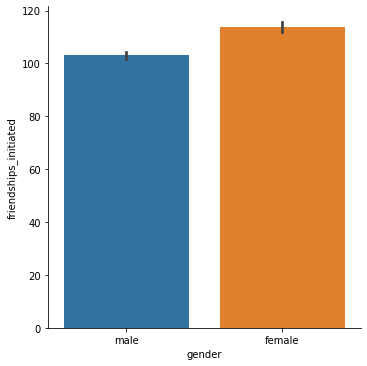

In [ ]:
# Get a catplot to analyze the friend request initiation distribution across genders
sns.catplot(x=fb_data.gender, y=fb_data.friendships_initiated, kind="bar", data=fb_data)

From the above graph, we have observed that female has initiated more friendships compared to males.

### What is the distribution of tenure across different categories of gender?


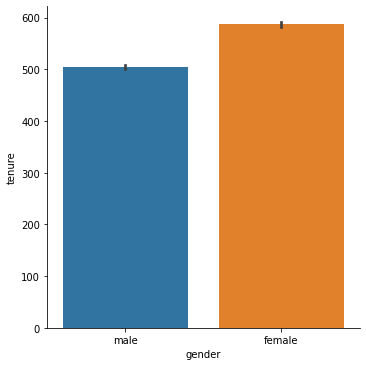

In [ ]:
# Get a catplot to analyze the friend request initiation distribution across genders
sns.catplot(x=fb_data.gender, y=fb_data.tenure, kind="bar", data=fb_data)

From the above graph, it is observed that female has an average tenure of more than 550 days while that of male is about 500 days.

##4) Analysis based on the least active users on Facebook

### How many users have no friends?

In [ ]:
# Find the number of FB users who do not have any friends.
len(fb_data[fb_data.friend_count==0])

1962

1962 users don't have any friends.

###  How many users did not like any posts?

In [ ]:
# Find the number of FB users who do not like any post.
len(fb_data[fb_data.likes==0])

22308

22308 users did not like any posts.

 ### How many users did not receive any likes?


In [ ]:
# Find the number of FB users who do not receive any likes.
len(fb_data[fb_data.likes_received==0])

24428

24428 users do not receive any likes.

## 5) Analysis based on the user accessibility (Mobile Devices vs. Web Devices)

 ### What is the average number of posts liked by users (based on gender) through web vs.mobile devices?

In [ ]:
# Get the average number of posts liked by users (based on gender) through web
print(fb_data.groupby(fb_data.gender).www_likes.mean())

gender
female    87.138297
male      24.490034
Name: www_likes, dtype: float64


In [ ]:
# Get the average number of posts liked by users (based on gender) through mobile
print(fb_data.groupby(fb_data.gender).mobile_likes.mean())

gender
female    172.912928
male       60.348176
Name: mobile_likes, dtype: float64


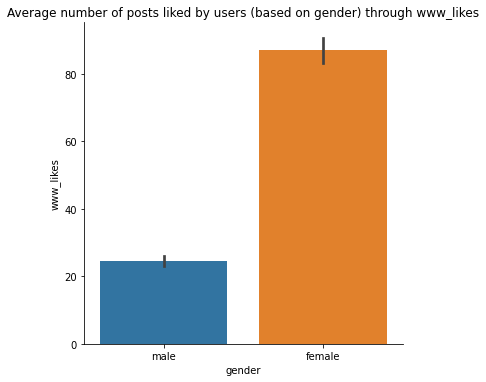

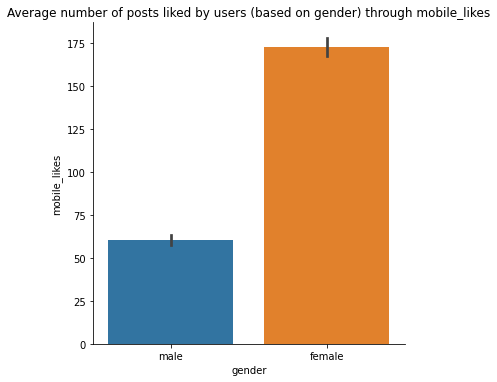

In [ ]:
# Visualize the above findings
for col in ['www_likes','mobile_likes']:
  sns.catplot(x=fb_data.gender, y=fb_data[col], kind="bar", data=fb_data)
  plt.title(f'Average number of posts liked by users (based on gender) through {col}')

From the above analysis, we observe that 
* the average number of posts liked by females through web is around 87 while that of male is around 24.
* the average number of posts liked by females through mobile is around 173 while that of male is around 60.

### What is the average number of likes received by users (based on gender) through web vs. mobile devices?

In [ ]:
# Get the average number of posts liked received by users (based on gender) through web
print(fb_data.groupby(fb_data.gender).www_likes_received.mean())

gender
female    104.334451
male       27.210863
Name: www_likes_received, dtype: float64


In [ ]:
# Get the average number of posts liked received by users (based on gender) through mobile
print(fb_data.groupby(fb_data.gender).mobile_likes_received.mean())

gender
female    147.100884
male       40.967199
Name: mobile_likes_received, dtype: float64


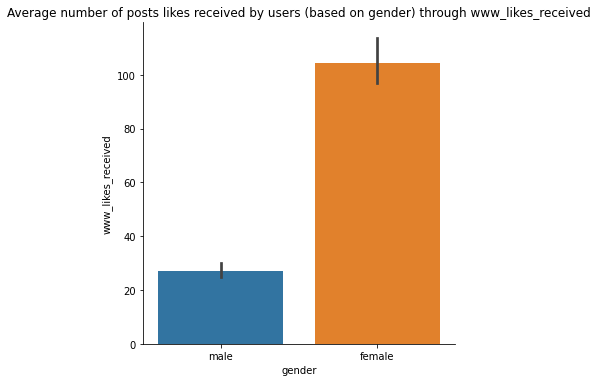

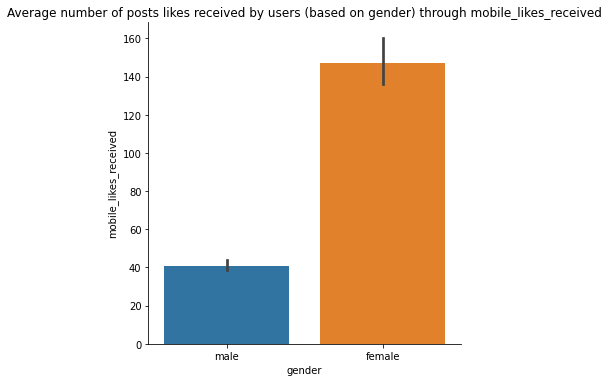

In [ ]:
# Visualize the above findings
for col in ['www_likes_received','mobile_likes_received']:
  sns.catplot(x=fb_data.gender, y=fb_data[col], kind="bar", data=fb_data)
  plt.title(f'Average number of posts likes received by users (based on gender) through {col}')

From the above analysis, we observe that
* the average number of posts likes received by females through web is around 104 while that of male is around 27.
* the average number of posts likes received by females through mobile is around 147 while that of male is around 41.